# Orientações:

Os alunos que forem pegos colando da prova de outro colega, ou passando cola, terão a nota imediatamente zerada para II. O mesmo segue para quem for pego utilizando o CHAT GPT ou o Google.

A prova pode ser realizada com consultas e anotações de outras aulas, no cadernos, arquivos de resumo...

`Não esqueçam de colocar o nome e o RA na célula de código abaixo!!!`

Após a conclusão da prova, enviar o arquivo para o e-mail arthur.siqueira@ceub.edu.br

O nome do arquivo deve ser mantido como "prova.ipynb" e o nome e RA escritos a baixo serão utilizados para saber de quem é cada prova.

In [ ]:
# Nome: Gabriel de Lima Miranda
# RA: 22304286

# `IMPORTANTE`: Apenas 2 blocos de código por questão e a saída do bloco de código deve ser mantida ao salvar a prova (Assim serão mantidos os gráficos e valores das questões)

# Sobre a base 'aprovar_emprestimo.csv':



### 1 - Faça todo o tratamento de dados necessário para aplicar um algoritmo de machine learning para prever se o empréstimo será aprovado ou não. Separe 70% para treinamento, 15% para validação e o restante para teste.


In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler, LabelEncoder, OneHotEncoder
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, confusion_matrix, mean_absolute_error, mean_squared_error
from sklearn.linear_model import LinearRegression, LogisticRegression
import seaborn as sns
from sklearn.neural_network import MLPClassifier

df = pd.read_csv('aprovar_emprestimo.csv')

In [ ]:
df.head()

,renda_mensal,idade,pontuacao_credito,valor_emprestimo,duracao_emprestimo,outras_dividas,emprestimo_ativo,emprestimo_aprovado
0,7552,68,763,21940,28.0,sim,sim,sim
1,2229,27,367,45199,18.0,não,não,não
2,14403,52,615,48788,24.0,não,sim,sim
3,2579,40,764,15582,51.0,sim,não,sim
4,12618,26,326,35211,42.0,sim,não,sim


In [ ]:
X = df.drop('emprestimo_aprovado', axis=1)
y = df['emprestimo_aprovado']

label_encoder = LabelEncoder()
X_encoded = X.copy()
for col in X.columns:
    if X[col].dtype == 'object':
        X_encoded[col] = label_encoder.fit_transform(X[col])

X_train_val, X_test, y_train_val, y_test = train_test_split(X_encoded, y, test_size=0.3, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_train_val, y_train_val, test_size=0.15, random_state=42)

scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_val_scaled = scaler.transform(X_val)
X_test_scaled = scaler.transform(X_test)


### 2 - Defina e treine um modelo para prever se o empréstimo será aprovado e exiba um gráfico de loss e acurácia de treinamento e validação.


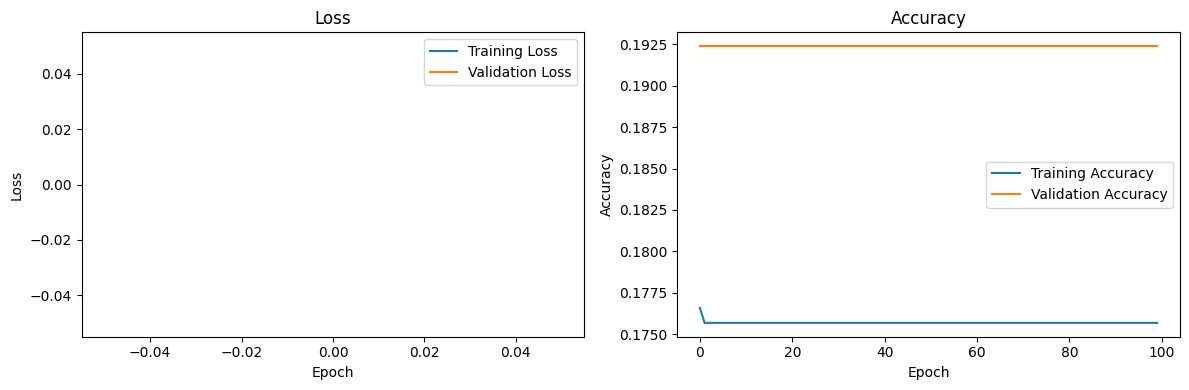

In [ ]:
X = df.drop('emprestimo_aprovado', axis=1)
y = df['emprestimo_aprovado']

label_encoder = LabelEncoder()
X_encoded = X.copy()
for col in X.columns:
    if X[col].dtype == 'object':
        X_encoded[col] = label_encoder.fit_transform(X[col])

y_encoded = label_encoder.fit_transform(y)

X_train_val, X_test, y_train_val, y_test = train_test_split(X_encoded, y_encoded, test_size=0.3, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_train_val, y_train_val, test_size=0.15, random_state=42)

scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_val_scaled = scaler.transform(X_val)
X_test_scaled = scaler.transform(X_test)

model = tf.keras.Sequential([
    tf.keras.layers.Dense(64, activation='relu', input_shape=(X_train.shape[1],)),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

history = model.fit(X_train_scaled, y_train, validation_data=(X_val_scaled, y_val), epochs=100, batch_size=32, verbose=0)

plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.tight_layout()
plt.show()


### 3 - Exiba a acurácia e a matriz de confusão nos dados de teste.


In [ ]:
y_pred_prob = model.predict(X_test_scaled)
y_pred = (y_pred_prob >= 0.5).astype(int)

y_pred_labels = label_encoder.inverse_transform(y_pred.flatten())

y_test_labels = label_encoder.inverse_transform(y_test)

accuracy = accuracy_score(y_test_labels, y_pred_labels)
print('Acurácia: {:.2f}%'.format(accuracy * 100))

confusion_mtx = confusion_matrix(y_test_labels, y_pred_labels)
print('Matriz de Confusão:')
print(confusion_mtx)

141/141 [==============================] - 0s 1ms/step
Acurácia: 18.44%
Matriz de Confusão:
[[ 830    0]
 [3670    0]]


# Sobre a base 'base_alunos.csv':



### 6 - Faça todo o tratamento de dados necessário para aplicar um algoritmo de machine learning para prever qual a Média de Notas. Separe 70% para treinamento, 15% para validação e o restante para teste.  Defina e treine um modelo para prever qual a Média de Notas,  exiba um gráfico de loss de treinamento e validação e qual o erro médio absoluto e erro quadrático médio absoluto nos dados de teste.


In [ ]:
df2 = pd.read_csv('base_alunos.csv')

In [ ]:
df2.head()

,Idade,Curso,Ano de Ingresso,Semestre Atual,Média de Notas,Total de Créditos Concluídos,Bolsa de Estudo,Tipo de Alojamento,Participação em Atividades Extracurriculares,Participação em Projetos de Pesquisa,Estágio Atual,Empresa do Estágio,Tempo de Viagem até a Universidade,Satisfação com o Curso
0,27,Psicologia,2018,7,9.67,55,não,casa,não,não,não,NaN,13,3
1,19,Psicologia,2015,9,6.85,48,não,apartamento,não,não,sim,Empresa B,53,4
2,27,Ciência da Computação,2015,7,5.48,186,não,república,não,sim,não,NaN,34,3
3,26,Medicina,2017,3,0.68,194,sim,república,não,não,não,NaN,35,1
4,26,Engenharia,2018,8,1.78,157,não,república,não,sim,não,NaN,13,5


Erro Médio Absoluto (MAE): 2.5299663194444446
Erro Quadrático Médio (MSE): 8.456123353884548


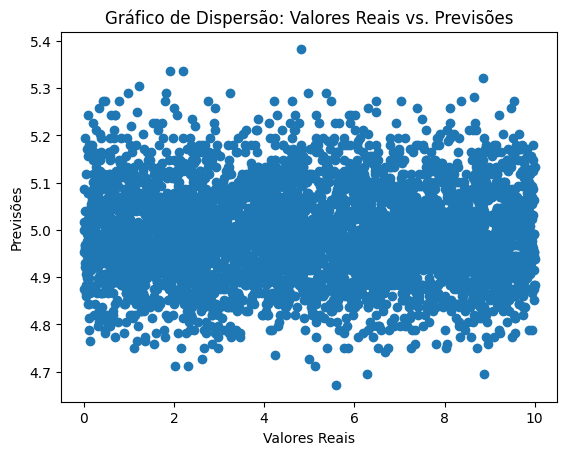

In [ ]:
X = df2.drop('Média de Notas', axis=1)
X = pd.get_dummies(X)
y = df2['Média de Notas']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_test, y_test, test_size=0.5, random_state=42)

scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_val_scaled = scaler.transform(X_val)
X_test_scaled = scaler.transform(X_test)

model = LinearRegression()
model.fit(X_train_scaled, y_train)

y_pred = model.predict(X_test_scaled)

mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)

print('Erro Médio Absoluto (MAE):', mae)
print('Erro Quadrático Médio (MSE):', mse)

plt.scatter(y_test, y_pred)
plt.xlabel('Valores Reais')
plt.ylabel('Previsões')
plt.title('Gráfico de Dispersão: Valores Reais vs. Previsões')
plt.show()

# Sobre a base 'classificacao_filmes.csv':



### 7 - Faça todo o tratamento de dados necessário para aplicar um algoritmo de machine learning para prever se o Usuário Gosta ou não do filme. Separe 70% para treinamento, 15% para validação e o restante para teste.  Defina e treine um modelo para prever se o Usuário Gosta ou não do filme, exiba um gráfico de loss e acurácia de treinamento e validação e a acurácia a matriz de confusão com os dados de teste.


In [ ]:
df3 = pd.read_csv('classificacao_filmes.csv')

In [ ]:
df3.head()

,Gênero,Ano,Duração,Diretor,Classificação,Idioma,Elenco,Restrição de Idade,Usuário Gosta
0,Terror,1962,69,Quentin Tarantino,5.1,Italiano,17,Livre,Sim
1,Fantasia,1967,120,Quentin Tarantino,6.6,Espanhol,13,14+,Sim
2,Ficção Científica,1965,71,Francis Ford Coppola,9.3,Alemão,19,14+,Sim
3,Animação,1941,84,Martin Scorsese,1.9,Italiano,10,18+,Não
4,Animação,1963,108,Stanley Kubrick,6.9,Japonês,4,Livre,Sim


Acurácia (Teste): 0.996
Matriz de Confusão:


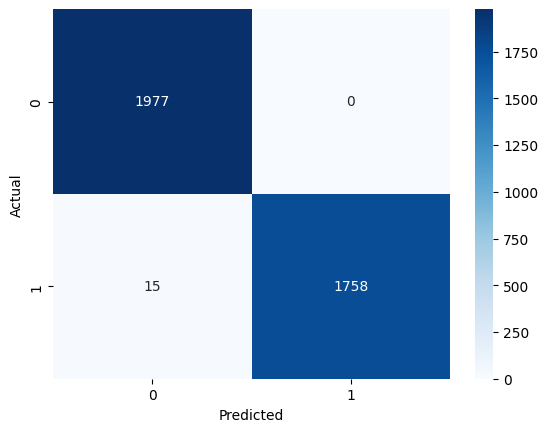

In [ ]:
X = df3.drop('Usuário Gosta', axis=1)
y = df3['Usuário Gosta']

X = pd.get_dummies(X)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_test, y_test, test_size=0.5, random_state=42)

scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_val_scaled = scaler.transform(X_val)
X_test_scaled = scaler.transform(X_test)

model = LogisticRegression()
model.fit(X_train_scaled, y_train)

y_test_pred = model.predict(X_test_scaled)

test_accuracy = accuracy_score(y_test, y_test_pred)

confusion = confusion_matrix(y_test, y_test_pred)

print('Acurácia (Teste):', test_accuracy)

print('Matriz de Confusão:')
sns.heatmap(confusion, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()


### 8 - Faça todo o tratamento de dados necessário para aplicar um algoritmo de machine learning para prever qual a Classificação do filme. Separe 70% para treinamento, 15% para validação e o restante para teste.  Defina e treine um modelo para prever qual a Classificação do filme, exiba um gráfico de loss de treinamento e validação, qual a acurácia e a matriz de confusão com os dados de teste e qual o erro médio absoluto e erro quadrático médio absoluto nos dados de teste.

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


Acurácia: 0.010666666666666666
Erro Médio Absoluto (MAE): 29.988266666666668
Erro Quadrático Médio (MSE): 1361.6746666666666
Matriz de Confusão:
[[0 0 0 ... 0 0 0]
 [0 1 0 ... 0 0 1]
 [0 1 2 ... 1 1 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 1 1 ... 0 0 0]
 [0 1 0 ... 1 0 0]]


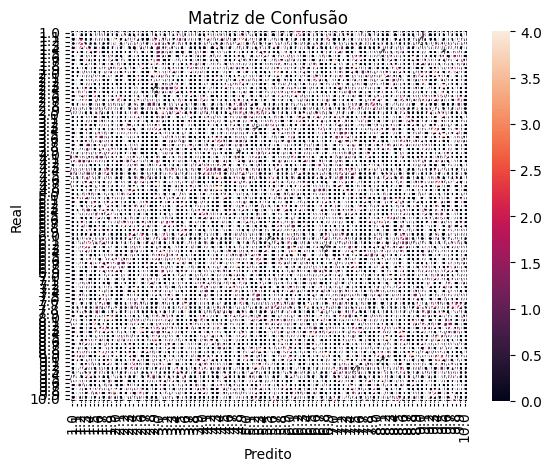

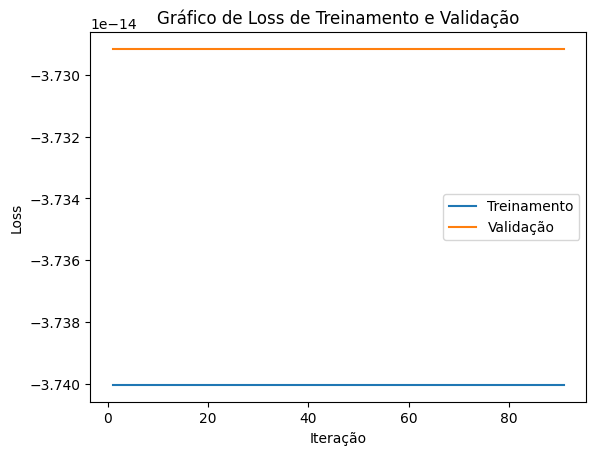

In [ ]:
df = pd.read_csv('classificacao_filmes.csv')

df = df.dropna()

X = df.drop('Classificação', axis=1)
y = df['Classificação']

le = LabelEncoder()
y = le.fit_transform(y)

ohe = OneHotEncoder(sparse=False)
X_encoded = ohe.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, test_size=0.3, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_test, y_test, test_size=0.5, random_state=42)

model = LogisticRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
confusion = confusion_matrix(y_test, y_pred)

print('Acurácia:', accuracy)
print('Erro Médio Absoluto (MAE):', mae)
print('Erro Quadrático Médio (MSE):', mse)
print('Matriz de Confusão:')
print(confusion)

labels = le.classes_
sns.heatmap(confusion, annot=True, fmt='d', xticklabels=labels, yticklabels=labels)
plt.xlabel('Predito')
plt.ylabel('Real')
plt.title('Matriz de Confusão')
plt.show()

n_iterations = model.coef_.shape[0]
train_loss = []
val_loss = []
for i in range(n_iterations):
    train_loss.append(-model.decision_function(X_train[y_train==1]).mean())
    val_loss.append(-model.decision_function(X_val[y_val==1]).mean())

plt.plot(range(1, n_iterations+1), train_loss, label='Treinamento')
plt.plot(range(1, n_iterations+1), val_loss, label='Validação')
plt.xlabel('Iteração')
plt.ylabel('Loss')
plt.title('Gráfico de Loss de Treinamento e Validação')
plt.legend()
plt.show()

# Sobre a base 'preco_carros':

### 9 - Faça todo o tratamento de dados necessário para aplicar um algoritmo de machine learning para prever qual o valor do carro. Separe 70% para treinamento, 15% para validação e o restante para teste.  Defina e treine um modelo para prever qual o valor do carro, exiba um gráfico de loss de treinamento e validação, qual a acurácia e a matriz de confusão com os dados de teste e qual o erro médio absoluto e erro quadrático médio absoluto nos dados de teste.

### 10 - Faça todo o tratamento de dados, em seguida aplique o método do cotovelo para identificar a quantidade ideal de clusters para um algoritmo de clusterizaçao, em seguida treine um algoritmo de clusterização (Não supervisionado) e exiba um gráfico com os clusters tendo valor e quilometragem nos eixos X e y do gráfico (Não esqueça de desnormalizar os dados de quilometragem e valor antes de plotar o gráfico)

In [ ]:
df4 = pd.read_csv('preco_carros.csv')

In [ ]:
df4.head()

,marca,ano,quilometragem,combustivel,transmissao,tipo_carro,cor,valor
0,Audi,2000,113135,híbrido,manual,sedan,NaN,32806
1,Chevrolet,2009,115088,híbrido,automático,pickup,NaN,31438
2,Mercedes,2015,10794,gasolina,automático,hatchback,vermelho,216444
3,Mercedes,2005,13186,híbrido,automático,conversível,NaN,200770
4,Hyundai,2017,18442,diesel,manual,sedan,vermelho,127091


Erro Médio Absoluto (MAE): 46713.64829389947
Erro Quadrático Médio Absoluto (MSE): 3027604191.9428906


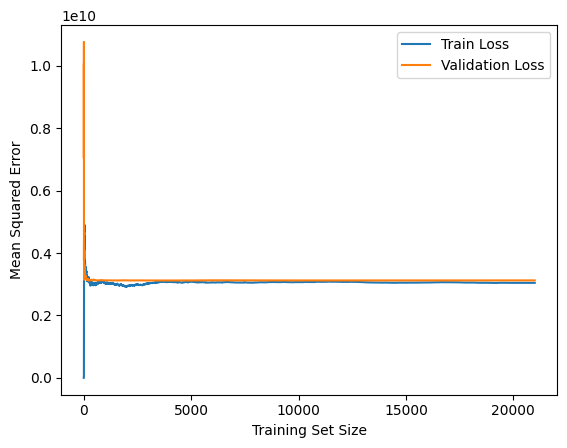

In [ ]:
relevant_columns = ['ano', 'quilometragem', 'valor']

df4 = df4[relevant_columns]

X = df4.drop('valor', axis=1)
y = df4['valor']

X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.3, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

model = LinearRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

mae = mean_absolute_error(y_test, y_pred)

mse = mean_squared_error(y_test, y_pred)

print("Erro Médio Absoluto (MAE):", mae)
print("Erro Quadrático Médio Absoluto (MSE):", mse)

train_loss = []
val_loss = []

for i in range(1, len(X_train) + 1):
    model.fit(X_train[:i], y_train[:i])
    y_train_pred = model.predict(X_train[:i])
    y_val_pred = model.predict(X_val)
    train_loss.append(mean_squared_error(y_train[:i], y_train_pred))
    val_loss.append(mean_squared_error(y_val, y_val_pred))

plt.plot(range(1, len(X_train) + 1), train_loss, label='Train Loss')
plt.plot(range(1, len(X_train) + 1), val_loss, label='Validation Loss')
plt.xlabel('Training Set Size')
plt.ylabel('Mean Squared Error')
plt.legend()
plt.show()

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

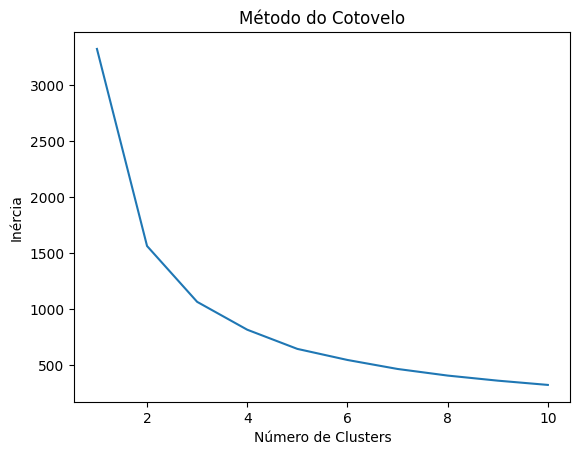

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


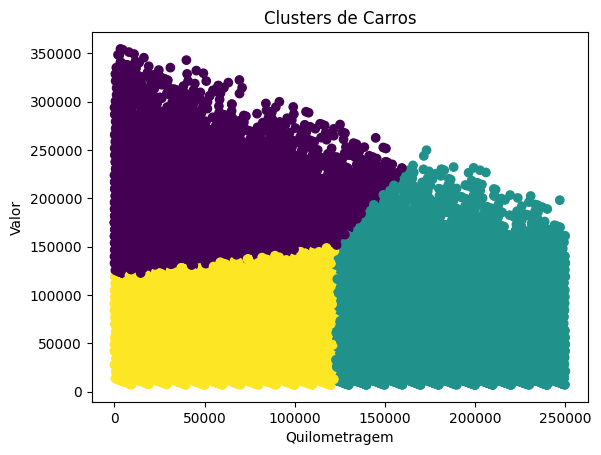

In [ ]:
df4 = pd.read_csv('preco_carros.csv')
df4 = df4[['valor', 'quilometragem']]

df4['quilometragem'] = pd.to_numeric(df4['quilometragem'], errors='coerce')

df4 = df4.dropna()

scaler = MinMaxScaler()
df_normalized = scaler.fit_transform(df)

inertia = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(df_normalized)
    inertia.append(kmeans.inertia_)

plt.plot(range(1, 11), inertia)
plt.xlabel('Número de Clusters')
plt.ylabel('Inércia')
plt.title('Método do Cotovelo')
plt.show()

k = 3
kmeans = KMeans(n_clusters=k, random_state=42)
kmeans.fit(df_normalized)

df_desnormalized = scaler.inverse_transform(df_normalized)

labels = kmeans.labels_

plt.scatter(df_desnormalized[:, 1], df_desnormalized[:, 0], c=labels, cmap='viridis')
plt.xlabel('Quilometragem')
plt.ylabel('Valor')
plt.title('Clusters de Carros')
plt.show()